## Setup

In [11]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import load_model

from PIL import Image
import cv2

In [17]:
file_0 = "second_task.png"
file_1 = "third_task.png" 
model_path = "C:/Users/yukic/Documents/ADA/model_1_5_epoch.h5"

label_name = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']) 

input_size = 32
channel = 3
test_size = 160
pred_size = test_size - input_size + 1

## Data

RGB
RGBA
second_task shape (160, 160, 3)
third_task shape (160, 160, 3)


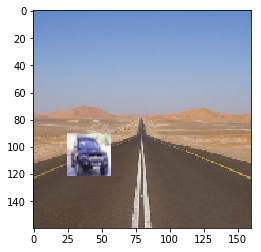

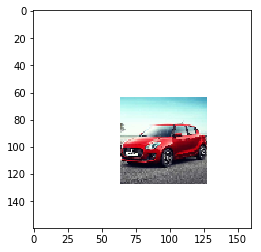

In [10]:
img_0 = Image.open(file_0)
print(img_0.mode)

img_1 = Image.open(file_1)
print(img_1.mode)
img_1 = img_1.convert("RGB")

print("second_task shape", np.array(img_0).shape)
print("third_task shape", np.array(img_1).shape)

plt.imshow(img_0)
plt.show()
plt.imshow(img_1)
plt.show()

## Model

In [13]:
loaded_model = load_model(model_path)
loaded_model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7200)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               3686912   
_______________________________________

## Preprocess

In [15]:
# preprocessing
img_0_ar = np.array(img_0)
print(img_0_ar.shape)
img_0_proc = img_0_ar.reshape((-1, test_size, test_size, channel))
print(img_0_proc.shape)
img_0_proc = img_0_proc.astype("float32")
img_0_proc /= 255

img_1_ar = np.array(img_1)
print(img_1_ar.shape)
img_1_proc = img_1_ar.reshape((-1, test_size, test_size, channel))
print(img_1_proc.shape)
img_1_proc = img_1_proc.astype("float32")
img_1_proc /= 255

(160, 160, 3)
(1, 160, 160, 3)
(160, 160, 3)
(1, 160, 160, 3)


## second_task

In [41]:
# predict all over the place
idx_matrix_0 = np.zeros((pred_size, pred_size))
prob_matrix_0 = np.zeros((pred_size, pred_size))

img_proc = img_0_proc

for j in range(pred_size):

    for i in range(pred_size):
        tmp = img_proc[:, j:(input_size+j), i:(input_size+i), :]
        pred_tmp = loaded_model.predict(tmp)
        idx_max = np.argmax(pred_tmp)
        prob_max = np.max(pred_tmp)

        # store values
        idx_matrix_0[j, i] = idx_max
        prob_matrix_0[j, i] = prob_max

In [ ]:
# predict all over the place
idx_matrix_0_0 = np.zeros((pred_size, pred_size))
prob_matrix_0_0 = np.zeros((pred_size, pred_size))

img_proc = img_0_proc

for j in range(pred_size):

    for i in range(pred_size):
        tmp = img_proc[:, j:(input_size+j), i:(input_size+i), :]
        pred_tmp = loaded_model.predict(tmp)
        
        # only car
        idx_car = 1
        prob_car = pred_tmp[0][1]

        # store values
        idx_matrix_0_0[j, i] = idx_car
        prob_matrix_0_0[j, i] = prob_car

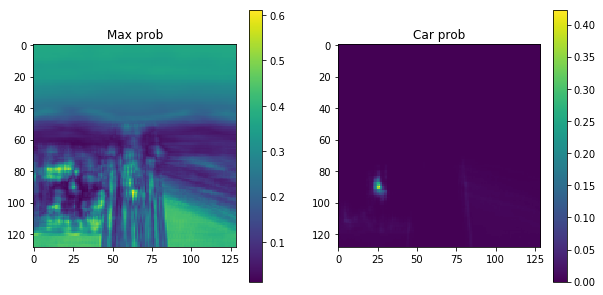

In [97]:
plt.figure(figsize = (10, 5))

plt.subplot(121)
plt.imshow(prob_matrix_0)
plt.title("Max prob")
plt.colorbar()

plt.subplot(122)
plt.imshow(prob_matrix_0_0)
plt.title("Car prob")
plt.colorbar()
plt.show()

We made many false positive predictions whose probabilities are higher than car prediction probabilities. So we cannot draw bounding boxes.

## third task

In [43]:
# predict all over the place
idx_matrix_1 = np.zeros((pred_size, pred_size))
prob_matrix_1 = np.zeros((pred_size, pred_size))

img_proc = img_1_proc

for j in range(pred_size):

    for i in range(pred_size):
        tmp = img_proc[:, j:(input_size+j), i:(input_size+i), :]
        pred_tmp = loaded_model.predict(tmp)
        idx_max = np.argmax(pred_tmp)
        prob_max = np.max(pred_tmp)

        # store values
        idx_matrix_1[j, i] = idx_max
        prob_matrix_1[j, i] = prob_max

In [44]:
# predict all over the place
idx_matrix_1_0 = np.zeros((pred_size, pred_size))
prob_matrix_1_0 = np.zeros((pred_size, pred_size))

img_proc = img_1_proc

for j in range(pred_size):

    for i in range(pred_size):
        tmp = img_proc[:, j:(input_size+j), i:(input_size+i), :]
        pred_tmp = loaded_model.predict(tmp)
        
        # only car
        idx_car = 1
        prob_car = pred_tmp[0][1]

        # store values
        idx_matrix_1_0[j, i] = idx_car
        prob_matrix_1_0[j, i] = prob_car

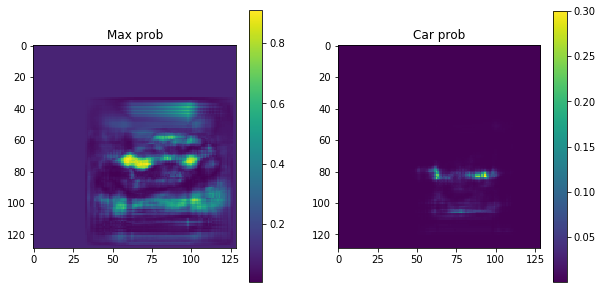

In [96]:
plt.figure(figsize = (10, 5))

plt.subplot(121)
plt.imshow(prob_matrix_1)
plt.title("Max prob")
plt.colorbar()

plt.subplot(122)
plt.imshow(prob_matrix_1_0)
plt.title("Car prob")
plt.colorbar()
plt.show()

Maximum probability of car is around 30%, but we have maximum false positive probability around 80%. The model is very confidently making incorrect predictions.

## Resize

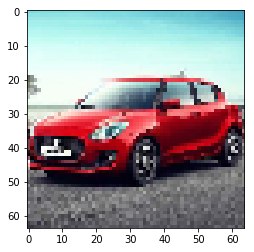

In [60]:
plt.imshow(img_1_ar[64:128, 64:128, :])
plt.show()

third task image has 64 by 64 car, but model input size is 32 by 32, so the model cannot contain a whole car image.

In [75]:
# tmp = img_1_proc[:, 64:128, 64:128, :]
# pred_tmp = loaded_model.predict(tmp)
# df = pd.DataFrame({'label':label_name, 'prediction':np.round(pred_tmp, decimals = 3).reshape((-1))})
# df

(32, 32, 3)


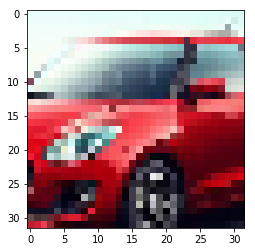

In [67]:
print(img_1_ar[80:112, 80:112, :].shape)
plt.imshow(img_1_ar[80:112, 80:112, :])
plt.show()

This is 32 by 32 shape, so model can have this input. But you cannot correctly make prediction like below.

In [68]:
tmp = img_1_proc[:, 80:112, 80:112, :]
pred_tmp = loaded_model.predict(tmp)
df = pd.DataFrame({'label':label_name, 'prediction':np.round(pred_tmp, decimals = 3).reshape((-1))})
df

,label,prediction
0,airplane,0.004
1,automobile,0.023
2,bird,0.000
3,cat,0.000
4,deer,0.000
5,dog,0.000
6,frog,0.000
7,horse,0.000
8,ship,0.000
9,truck,0.058


Original size (64, 64, 3)
Resized size (32, 32)


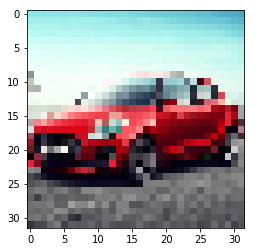

In [77]:
tmp = img_1_ar[64:128, 64:128, :]
print("Original size", tmp.shape)

img_tmp = Image.fromarray(tmp)
img_tmp = img_tmp.resize((input_size, input_size))
print("Resized size", img_tmp.size)

plt.imshow(img_tmp)
plt.show()

In [78]:
# preprocess
img_tmp_ar = np.array(img_tmp)
img_tmp_proc = img_tmp_ar.reshape((-1, 32, 32, channel))
print(img_tmp_proc.shape)
img_tmp_proc = img_tmp_proc.astype("float32")
img_tmp_proc /= 255

# prediction
pred_tmp = loaded_model.predict(img_tmp_proc)
df = pd.DataFrame({'label':label_name, 'prediction':np.round(pred_tmp, decimals = 3).reshape((-1))})
df

(1, 32, 32, 3)


,label,prediction
0,airplane,0.001
1,automobile,0.014
2,bird,0.000
3,cat,0.000
4,deer,0.000
5,dog,0.000
6,frog,0.000
7,horse,0.000
8,ship,0.001
9,truck,0.063


## Image pyramid

In [85]:
# resize
new_size = test_size // 2
img_1_re = img_1.resize((new_size, new_size))
print("third_task.png resized to", img_1_re.size)

# preprocess
img_1_re_ar = np.array(img_1_re)
img_1_re_proc = img_1_re_ar.reshape((-1, new_size, new_size, channel))
img_1_re_proc = img_1_re_proc.astype("float32")
img_1_re_proc /= 255

# update prediction range
pred_size = new_size - input_size + 1
print("Prediction matrix has {} by {}".format(pred_size, pred_size))

# prediction
idx_matrix_1_1 = np.zeros((pred_size, pred_size))
prob_matrix_1_1 = np.zeros((pred_size, pred_size))
idx_matrix_1_2 = np.zeros((pred_size, pred_size))
prob_matrix_1_2 = np.zeros((pred_size, pred_size))

img_proc = img_1_re_proc
# all classes
for j in range(pred_size):

    for i in range(pred_size):
        tmp = img_proc[:, j:(input_size+j), i:(input_size+i), :]
        pred_tmp = loaded_model.predict(tmp)
        idx_max = np.argmax(pred_tmp)
        prob_max = np.max(pred_tmp)

        # store values
        idx_matrix_1_1[j, i] = idx_max
        prob_matrix_1_1[j, i] = prob_max

# only car
for j in range(pred_size):

    for i in range(pred_size):
        tmp = img_proc[:, j:(input_size+j), i:(input_size+i), :]
        pred_tmp = loaded_model.predict(tmp)
        
        # only car
        idx_car = 1
        prob_car = pred_tmp[0][1]

        # store values
        idx_matrix_1_2[j, i] = idx_car
        prob_matrix_1_2[j, i] = prob_car

third_task.png resized to (80, 80)
Prediction matrix has 49 by 49


In [93]:
# resize
new_size = test_size // 4
img_1_re = img_1.resize((new_size, new_size))
print("third_task.png resized to", img_1_re.size)

# preprocess
img_1_re_ar = np.array(img_1_re)
img_1_re_proc = img_1_re_ar.reshape((-1, new_size, new_size, channel))
img_1_re_proc = img_1_re_proc.astype("float32")
img_1_re_proc /= 255

# update prediction range
pred_size = new_size - input_size + 1
print("Prediction matrix has {} by {}".format(pred_size, pred_size))

# prediction
idx_matrix_1_3 = np.zeros((pred_size, pred_size))
prob_matrix_1_3 = np.zeros((pred_size, pred_size))
idx_matrix_1_4 = np.zeros((pred_size, pred_size))
prob_matrix_1_4 = np.zeros((pred_size, pred_size))

img_proc = img_1_re_proc
# all classes
for j in range(pred_size):

    for i in range(pred_size):
        tmp = img_proc[:, j:(input_size+j), i:(input_size+i), :]
        pred_tmp = loaded_model.predict(tmp)
        idx_max = np.argmax(pred_tmp)
        prob_max = np.max(pred_tmp)

        # store values
        idx_matrix_1_3[j, i] = idx_max
        prob_matrix_1_3[j, i] = prob_max

# only car
for j in range(pred_size):

    for i in range(pred_size):
        tmp = img_proc[:, j:(input_size+j), i:(input_size+i), :]
        pred_tmp = loaded_model.predict(tmp)
        
        # only car
        idx_car = 1
        prob_car = pred_tmp[0][1]

        # store values
        idx_matrix_1_4[j, i] = idx_car
        prob_matrix_1_4[j, i] = prob_car

third_task.png resized to (40, 40)
Prediction matrix has 9 by 9


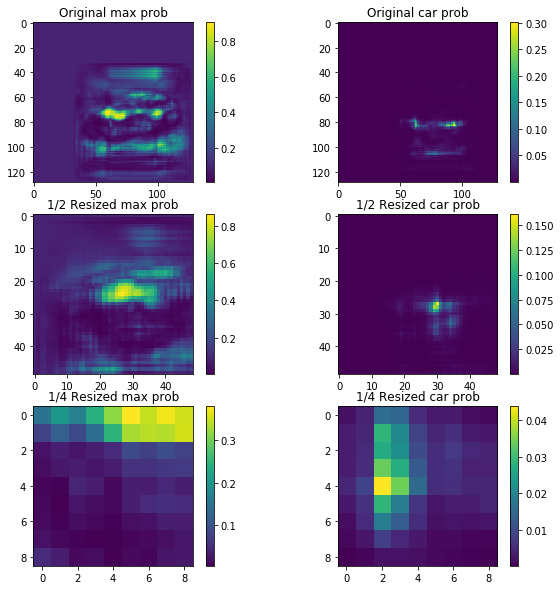

In [94]:
plt.figure(figsize = (10, 10))

plt.subplot(321)
plt.imshow(prob_matrix_1)
plt.title("Original max prob")
plt.colorbar()

plt.subplot(322)
plt.imshow(prob_matrix_1_0)
plt.title("Original car prob")
plt.colorbar()

plt.subplot(323)
plt.imshow(prob_matrix_1_1)
plt.title("1/2 Resized max prob")
plt.colorbar()

plt.subplot(324)
plt.imshow(prob_matrix_1_2)
plt.title("1/2 Resized car prob")
plt.colorbar()

plt.subplot(325)
plt.imshow(prob_matrix_1_3)
plt.title("1/4 Resized max prob")
plt.colorbar()

plt.subplot(326)
plt.imshow(prob_matrix_1_4)
plt.title("1/4 Resized car prob")
plt.colorbar()

plt.show()

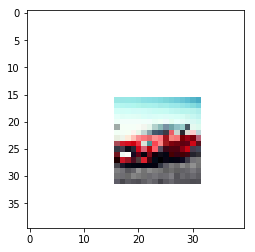

In [95]:
plt.imshow(img_1_re)
plt.show()

We find that false positive is too strong, so we cannot draw bounding boxes, so we need to improve classification model.